# TP2 Interpolation Numérique 
<img src="tp2an.png">

## Exercice 1

**Polynome d'interpolation de Lagrange** 
> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  **x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))**  et  **y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))**  deux vecteurs de même longueur  `n` et `c`  un nombre réel donné.

In [1]:
from numpy import prod
def PR(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
    #print(L)    
    return  sum(S)

In [2]:

X=[1 ,2 ,3 ,4,-2];
Y=[-1, 0, 2 ,1,3];
for i in X:
    print(PR(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0
3.0


8

2) Que contient le vecteur  LL  après la fin de la boucle  kk .

<h2>L = [1.0, 1.0, 1.0, 1.0, 1]</h2>

3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

0.5


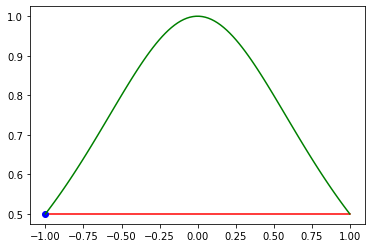

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-1, 0.1, 1)
def f(a): 1/(1+a**2)
y= [f(i) for i in x]
for i in range (0,len(x)):
    y[i]= 1/(1+x[i]**2)
    print(y[i])

pt=[]
t=np.linspace(-1,1,100);

pt=[ PR(x,y,t[u]) for u in range (0,len(t))]

z= [f(i) for i in t]
for i in range (0,len(t)):
    z[i]= 1/(1+t[i]**2)

plt.plot(t,pt,'r')
plt.plot(x,y,'bo')
plt.plot(t,z,'g')
plt.show()


4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

[2.141592653589793, 2.3686053650508807, 2.599514142886376, 2.8251750683297643, 3.03501535443322, 3.21585111216593, 3.3495133828127512, 3.406845924025366, 3.3257582200728057, 2.6012903477216534]
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


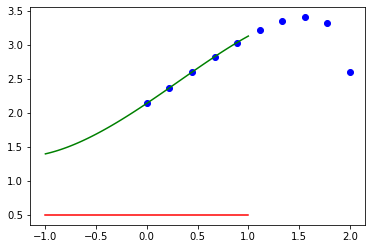

In [4]:
x=np.linspace(0, 2, 10)
def f(x): np.pi-np.cos(x/2)+x*np.sqrt(1-(x/2)**2) 

y= [f(i) for i in x]
for i in range (0,len(x)):
    y[i]= np.pi-np.cos(x[i]/2)+x[i]*np.sqrt(1-(x[i]/2)**2)

print(y)
print(x)
pn=[]

pn=[ PR(x,y,t[u]) for u in range (0,len(t))]

z= [f(i) for i in t]
for i in range (0,len(t)):
    z[i]= np.pi-np.cos(t[i]/2)+t[i]*np.sqrt(1-(t[i]/2)**2)

plt.plot(t,pt,'r')
plt.plot(x,y,'bo')
plt.plot(t,z,'g')
plt.show()


2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

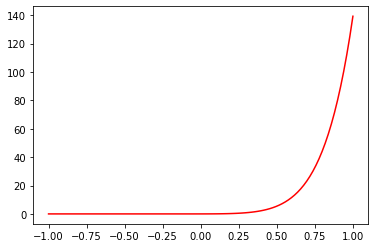

In [7]:
x=np.linspace(-2, 0, 10)

f = lambda x:  np.pi-np.cos(x/2)+x*np.sqrt(1-(x/2)**2)

y= [f(i) for i in x]
for i in range (0,len(x)):
    y[i]= np.pi-np.cos(x[i]/2)+x[i]*np.sqrt(1-(x[i]/2)**2)
pn=[]
pn=[ PR(x,y,t[u]) for u in range (0,len(t))]


v=[z[j]-pn[j] for j in range(0,len(z)) ]

plt.plot(t,v,'r')
plt.show()

## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, 'Interpo Equidistante N=10')

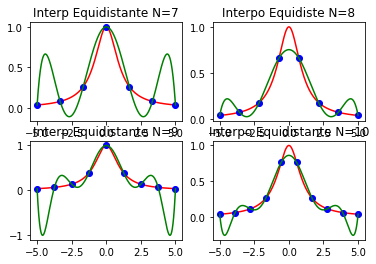

In [25]:
import numpy as np
N=7
X=np.linspace(-5,5,N)
f = lambda x:  1./(1 + x**2)
Y= [f(i) for i in X]
for i in range (0,len(X)):
    Y[i]= 1/(1+X[i]**2)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)

plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interp Equidistante N=7")
##############################
N=8
X=np.linspace(-5,5,N)
f = lambda x:  1./(1 + x**2)
Y= [f(i) for i in X]
for i in range (0,len(X)):
    Y[i]= 1/(1+X[i]**2)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpo Equidiste N=8")
##############################
N=9
X=np.linspace(-5,5,N)
f = lambda x:  1./(1 + x**2)
Y= [f(i) for i in X]
for i in range (0,len(X)):
    Y[i]= 1/(1+X[i]**2)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interp Equidistante N=9")
##############################
N=10
X=np.linspace(-5,5,N)
f = lambda x:  1./(1 + x**2)
Y= [f(i) for i in X]
for i in range (0,len(X)):
    Y[i]= 1/(1+X[i]**2)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpo Equidistante N=10")

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [71]:
import math
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return v
print(tcheb(-5,5,11))

[-4.755282581475767, -5.0, -4.755282581475767, -4.045084971874737, -2.938926261462366, -1.5450849718747373, -3.061616997868383e-16, 1.5450849718747368, 2.938926261462365, 4.045084971874736, 4.755282581475767]


C:\Users\najla\Anaconda_3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\najla\Anaconda_3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\najla\Anaconda_3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\najla\Anaconda_3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

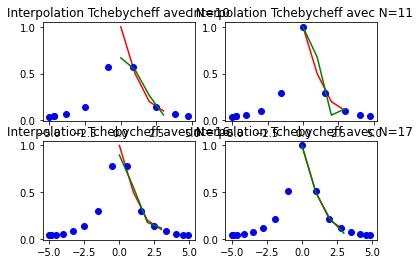

In [78]:
N=10
f=lambda x: 1/(1+np.power(x,2));
Xt=tcheb(-5,5,N)
Yt=f(Xt)
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")
##########################################
N=11;
f=lambda x: 1/(1+np.power(x,2));
Xt=tcheb(-5,5,N);
Yt=f(Xt);
pt=np.polyfit(Xt,Yt,N-1);
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")
##########################################
N=16;
f=lambda x: 1/(1+np.power(x,2));
Xt=tcheb(-5,5,N);
Yt=f(Xt);
pt=np.polyfit(Xt,Yt,N-1);
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")
##########################################

N=17;
f=lambda x: 1/(1+np.power(x,2));
Xt=tcheb(-5,5,N);
Yt=f(Xt);
pt=np.polyfit(Xt,Yt,N-1);
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")


## Exercice 3

On considère les deux programme MATLAB suivant :
``` octave
function f=intN(x,f)% RECURSIVE
m=length(x);
for k=2:m;
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
end
``` 
``` octave
function p=intNval(x,c,t)
m=length(x);
p=c(m)*ones(size(t));
for k=m-1:-1:1;
    p=p.*(t-x(k))+c(k);
end
```

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [50]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range (1,m):
        print(f[k:m])
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    
    return f

In [59]:
x=[-1,0,2,5];
y=[6,1,3,66];
intN(x,y)


[0. 0. 0.]
[ 1. 21.]
[12.6]


array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [65]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [66]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
f=intNval(x,y,t)

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

[0. 0. 0.]
[ 1. 21.]
[12.6]


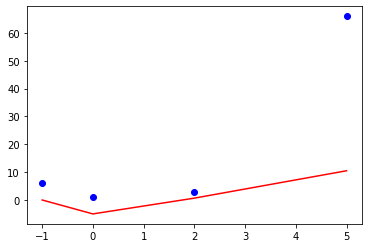

In [67]:
x=[-1,0,2,5];
y=[6,1,3,66];
f=intN(x,y);
plt.plot(x,f,'r',x,y,'ob')

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [68]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
p=intNval(x,y,t);
p[0]

7.0

4) Recalculer à la main et puis à l'aide du Programme neville la valeur de $P(1)$.

In [ ]:
0.7